# Finding the best car model to buy on Ebay 

## Introduction

In this project we will aim to find:
- What is the most popular brand/model from second hand cars. 
- Is it worth to buy damaged car?
- How mileage changes the price.
- What is the most expensive brand.

We will be working on a dataset scrapped from [German Ebay](https://www.kaggle.com/orgesleka/used-cars-database/data)


### Summary of results

Our analysis shows that:
- The most popular car producer on the second hand market is Volkswagen and VV golf is its most popular model. 
- The most expensive brands out of 10 most popular are: Audi, Mercedez-Benz and BMW.
- If you are interested in buing damaged car you can save around 36%.


## Data preparation

### Importing data

In [166]:
import numpy as np
import pandas as pd
import inflection
import matplotlib.pyplot as plt

autos=pd.read_csv('data//autos.csv', encoding='Windows-1252')

autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We have read our **autos.csv** file as a pandas dateframe object. Our data frame has 20 columns and 50000 rows. As we can see the dominant date type is the table is string, 5 columns are intiger type. Some of the rows have null values.

### Data cleaning

Lets modify some column's names to make them more self-explaining.

In [167]:
def headerEdit(mark):
    mark=mark.replace('yearOfRegistration','registration_year')
    mark=mark.replace('monthOfRegistration','registration_month')
    mark=mark.replace('notRepairedDamage','unrepaired_damage')
    mark=mark.replace('dateCreated','ad_created')
    mark=inflection.tableize(mark)
    return mark
corrected_column_names=[]
for mark_string in autos.columns:
    marked=headerEdit(mark_string)
    corrected_column_names.append(marked)
autos.columns=corrected_column_names

In [168]:
autos.columns

Index(['date_crawleds', 'names', 'sellers', 'offer_types', 'prices', 'abtests',
       'vehicle_types', 'registration_years', 'gearboxes', 'power_ps',
       'models', 'odometers', 'registration_months', 'fuel_types', 'brands',
       'unrepaired_damages', 'ad_createds', 'nr_of_pictures', 'postal_codes',
       'last_seens'],
      dtype='object')

Above we have iterated over all column's names to modify them. Using **inflection** we have modified all camelcase names to snakecase. Some of them we have also modified manually to be more self-explaning. We have also printed column's names to inspect changes.

In [169]:
autos.describe(include='all')

,date_crawleds,names,sellers,offer_types,prices,abtests,vehicle_types,registration_years,gearboxes,power_ps,models,odometers,registration_months,fuel_types,brands,unrepaired_damages,ad_createds,nr_of_pictures,postal_codes,last_seens
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 15:49:30,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Based on above we can see that columns: **unrepaired_damages**, **gearbox** and **offerType** contain string values in German, lets translate them to English once they have just a few unique values.

In [170]:
print(autos['unrepaired_damages'].unique())
print(autos['gearboxes'].unique())
print(autos['offer_types'].unique())

['nein' nan 'ja']
['manuell' 'automatik' nan]
['Angebot' 'Gesuch']


In [171]:
mapping_dict= {'nein':'no', 'ja':'yes',
               'manuell':'manual', 'automatik':'automatic',
               'Angebot':'offer','Gesuch':'request'
              }
autos['unrepaired_damages']=autos['unrepaired_damages'].map(mapping_dict)
autos['gearboxes']=autos['gearboxes'].map(mapping_dict)
autos['offer_types']=autos['offer_types'].map(mapping_dict)

In [172]:
autos.describe(include='all')

,date_crawleds,names,sellers,offer_types,prices,abtests,vehicle_types,registration_years,gearboxes,power_ps,models,odometers,registration_months,fuel_types,brands,unrepaired_damages,ad_createds,nr_of_pictures,postal_codes,last_seens
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 15:49:30,Ford_Fiesta,privat,offer,$0,test,limousine,NaN,manual,NaN,golf,"150,000km",NaN,benzin,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We have printed the description of our dataframe. Now we want to look into values in each cell whether we can modified their type to make our analysis easier. We can note that:

- Values in **price** and **odometers** column are stored as string type but we can actually convert in to intiger type.

- Values in columns **date_crawleds**, **ad_createds** and **last_seen** are all datatime format so we can also convert them.

Let's start with the first bullet.

In [173]:
autos['prices']=autos['prices'].str.replace('$','').str.replace(',','').astype(int)
autos['odometers']=autos['odometers'].str.replace('km','').str.replace(',','').astype(int)
autos.rename({'prices':'prices_dol', 'odometers':'odometers_km'},inplace=True, axis='columns')

In [174]:
autos.head()

,date_crawleds,names,sellers,offer_types,prices_dol,abtests,vehicle_types,registration_years,gearboxes,power_ps,models,odometers_km,registration_months,fuel_types,brands,unrepaired_damages,ad_createds,nr_of_pictures,postal_codes,last_seens
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,offer,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,offer,8500,control,limousine,1997,automatic,286,7er,150000,6,benzin,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,offer,8990,test,limousine,2009,manual,102,golf,70000,7,benzin,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,offer,4350,control,kleinwagen,2007,automatic,71,fortwo,70000,6,benzin,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,offer,1350,test,kombi,2003,manual,0,focus,150000,7,benzin,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We have changed the data type in two columns to integers,to not lose the information about the unit we have added that to the column's names. Above we can see how our dataframe curently looks like.

In [175]:
autos['odometers_km'].value_counts().sort_index(ascending=True)

5000        967
10000       264
20000       784
30000       789
40000       819
50000      1027
60000      1164
70000      1230
80000      1436
90000      1757
100000     2169
125000     5170
150000    32424
Name: odometers_km, dtype: int64

Here we can see different km values witch our table. There is quite a big number of cars below 5000 km driven. Lets investigate the registraction year of some of them.

In [176]:
autos.loc[:,['odometers_km','registration_years']].sort_values('odometers_km').head(10)

,odometers_km,registration_years
9686,5000,2005
21079,5000,2011
4225,5000,1995
47280,5000,2005
36282,5000,2000
36278,5000,2005
47310,5000,2016
21226,5000,2004
4164,5000,5000
21250,5000,1961


We can see that some values are incorrect. It's not possible that a car has only 5000 km mileage and was registered in 2005 or even in 1961! Futhermore we can see that row **4164** column **registration_years** has value **5000**. That's also not possible. Lets replace those unrealistic values with NaN values.

In [177]:
real_year=autos.loc[:,'registration_years'] < 2015
distance=autos.loc[:,'odometers_km'] == 5000
combined_criteria=real_year & distance
autos.loc[combined_criteria,'odometers_km']=np.nan

In [178]:
autos.loc[:,['odometers_km','registration_years']].sort_values('odometers_km').head(10)

,odometers_km,registration_years
37597,5000.0,2015
49340,5000.0,2016
11525,5000.0,2015
40955,5000.0,2016
36729,5000.0,2015
46499,5000.0,2015
15279,5000.0,2017
12682,5000.0,2016
48425,5000.0,2015
38299,5000.0,2015


Lets now inspect highest values if any mismatches.

In [179]:
autos.loc[:,['odometers_km','registration_years']].sort_values('odometers_km',ascending=False).head(10)

,odometers_km,registration_years
0,150000.0,2004
29984,150000.0,2003
29976,150000.0,2017
29977,150000.0,2002
29978,150000.0,1996
29979,150000.0,2010
29981,150000.0,2002
29982,150000.0,1998
29983,150000.0,2017
29985,150000.0,2006


In [180]:
real_year=autos.loc[:,'registration_years'] > 2016
distance=autos.loc[:,'odometers_km'] == 150000
combined_criteria=real_year & distance
autos.loc[combined_criteria,'odometers_km']=np.nan
autos.loc[:,['odometers_km','registration_years']].sort_values('odometers_km',ascending=False).head(10)

,odometers_km,registration_years
0,150000.0,2004
29920,150000.0,2005
29896,150000.0,2003
29897,150000.0,2016
29898,150000.0,2009
29899,150000.0,1995
29901,150000.0,2005
29902,150000.0,1993
29904,150000.0,1999
29905,150000.0,2004


So we have removed outliers values from **odometers_km** column. Let's now look into our second column

In [181]:
autos['prices_dol'].unique().shape
autos['prices_dol'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: prices_dol, dtype: float64

In [182]:
autos['prices_dol'].value_counts().sort_index(ascending=False)

99999999       1
27322222       1
12345678       3
11111111       2
10000000       1
            ... 
5              2
3              1
2              3
1            156
0           1421
Name: prices_dol, Length: 2357, dtype: int64

As we can see there is *1421* zeros some and more very low values. From the top there are also some certainly wrong values. Next let's remove them.

In [183]:
acceptable_prices=autos['prices_dol'].between(200,500000)
autos.loc[~acceptable_prices,'prices_dol']=np.nan
autos['prices_dol'].value_counts().sort_index(ascending=False)

350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
           ... 
217.0         1
215.0         2
210.0         1
205.0         1
200.0       266
Name: prices_dol, Length: 2280, dtype: int64

Here we have removed unrealistic prices. We filled these gaps by NaN value.

Next let's explore more about **date_crawleds**, **ad_created** and **last_seen** columns as all are datetime type. First **date_crawleds**:

In [184]:
crawleds_distribution=autos['date_crawleds'].str[:10].value_counts(normalize=True,dropna=False).sort_index(ascending=True)
print(crawleds_distribution)

2016-03-05    0.02538
2016-03-06    0.01394
2016-03-07    0.03596
2016-03-08    0.03330
2016-03-09    0.03322
2016-03-10    0.03212
2016-03-11    0.03248
2016-03-12    0.03678
2016-03-13    0.01556
2016-03-14    0.03662
2016-03-15    0.03398
2016-03-16    0.02950
2016-03-17    0.03152
2016-03-18    0.01306
2016-03-19    0.03490
2016-03-20    0.03782
2016-03-21    0.03752
2016-03-22    0.03294
2016-03-23    0.03238
2016-03-24    0.02910
2016-03-25    0.03174
2016-03-26    0.03248
2016-03-27    0.03104
2016-03-28    0.03484
2016-03-29    0.03418
2016-03-30    0.03362
2016-03-31    0.03192
2016-04-01    0.03380
2016-04-02    0.03540
2016-04-03    0.03868
2016-04-04    0.03652
2016-04-05    0.01310
2016-04-06    0.00318
2016-04-07    0.00142
Name: date_crawleds, dtype: float64


As we can see above the data was gathered between *2016-03-05* and *2016-04-07*

In [185]:
createds_distribution=autos['ad_createds'].str[:10].value_counts(normalize=True,dropna=False).sort_index(ascending=True)
print(createds_distribution)

2015-06-11    0.00002
2015-08-10    0.00002
2015-09-09    0.00002
2015-11-10    0.00002
2015-12-05    0.00002
               ...   
2016-04-03    0.03892
2016-04-04    0.03688
2016-04-05    0.01184
2016-04-06    0.00326
2016-04-07    0.00128
Name: ad_createds, Length: 76, dtype: float64


As we can see above the offers were added between *2015-06-11* and *2016-04-07*

In [186]:
seens_distribution=autos['last_seens'].str[:10].value_counts(normalize=True,dropna=False).sort_index(ascending=True)
print(seens_distribution.head())

2016-03-05    0.00108
2016-03-06    0.00442
2016-03-07    0.00536
2016-03-08    0.00760
2016-03-09    0.00986
Name: last_seens, dtype: float64


Now lets explore **registration_years** column, as we previously sow some mismatches there.

In [187]:
autos['registration_years'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_years, dtype: float64

Min value is *1000* while max is *9999*. Let's clean that column as well.

In [188]:
ok_years=autos['registration_years'].between(1900,2016)
autos.loc[~ok_years,['registration_years','odometers_km']]

,registration_years,odometers_km
10,2017,NaN
55,2017,125000.0
65,2017,125000.0
68,2017,100000.0
84,2018,NaN
...,...,...
49796,2017,70000.0
49841,2017,NaN
49880,2017,NaN
49910,9000,10000.0


There is *1972* rows with registration year earlier then 1900 or later then 2016 which is impossible. Lets replace these values with NaN.

In [189]:
autos.loc[~ok_years,'registration_years']=np.nan

In [190]:
autos['registration_years'].value_counts(normalize=True).sort_index()

1910.0    0.000187
1927.0    0.000021
1929.0    0.000021
1931.0    0.000021
1934.0    0.000042
            ...   
2012.0    0.027546
2013.0    0.016782
2014.0    0.013867
2015.0    0.008308
2016.0    0.027401
Name: registration_years, Length: 78, dtype: float64

Now we have only cars registered between *1910* and *2016*.
Let's then convert columns which include datetime objects to integers.

In [191]:
autos['last_seens']=autos['last_seens'].str[:10].str.replace('-','').astype(int)
autos['ad_createds']=autos['ad_createds'].str[:10].str.replace('-','').astype(int)
autos['date_crawleds']=autos['date_crawleds'].str[:10].str.replace('-','').astype(int)

In [192]:
autos.describe(include='all')

,date_crawleds,names,sellers,offer_types,prices_dol,abtests,vehicle_types,registration_years,gearboxes,power_ps,models,odometers_km,registration_months,fuel_types,brands,unrepaired_damages,ad_createds,nr_of_pictures,postal_codes,last_seens
count,5.000000e+04,50000,50000,50000,47645.000000,50000,44905,48028.00000,47320,50000.000000,47242,47863.000000,50000.000000,45518,50000,40171,5.000000e+04,50000.0,50000.000000,5.000000e+04
unique,NaN,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,NaN,NaN,NaN,NaN
top,NaN,Ford_Fiesta,privat,offer,NaN,test,limousine,NaN,manual,NaN,golf,NaN,NaN,benzin,volkswagen,no,NaN,NaN,NaN,NaN
freq,NaN,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,NaN,NaN,NaN,NaN
mean,2.016033e+07,NaN,NaN,NaN,6000.707273,NaN,NaN,2002.80351,NaN,116.355920,NaN,126897.081253,5.723360,NaN,NaN,NaN,2.016033e+07,0.0,50813.627300,2.016037e+07
std,3.191153e+01,NaN,NaN,NaN,9110.783444,NaN,NaN,7.31085,NaN,209.216627,NaN,37821.579527,3.711984,NaN,NaN,NaN,1.074313e+02,0.0,25779.747957,4.223244e+01
min,2.016030e+07,NaN,NaN,NaN,200.000000,NaN,NaN,1910.00000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,2.015061e+07,0.0,1067.000000,2.016030e+07
25%,2.016031e+07,NaN,NaN,NaN,1300.000000,NaN,NaN,1999.00000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,2.016031e+07,0.0,30451.000000,2.016032e+07
50%,2.016032e+07,NaN,NaN,NaN,3190.000000,NaN,NaN,2003.00000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,2.016032e+07,0.0,49577.000000,2.016040e+07
75%,2.016033e+07,NaN,NaN,NaN,7500.000000,NaN,NaN,2008.00000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,2.016033e+07,0.0,71540.000000,2.016041e+07


## Data analysis

Lets now aggregate data by brand.

In [193]:
autos['brands'].unique().shape

(40,)

### The most expensive brand
There is *40* unique brands lets pick 10 most common ones.

In [194]:
autos['brands'].value_counts(normalize=True).head(10)

volkswagen       0.21374
opel             0.10922
bmw              0.10858
mercedes_benz    0.09468
audi             0.08566
ford             0.06958
renault          0.04808
peugeot          0.02912
fiat             0.02616
seat             0.01882
Name: brands, dtype: float64

In [195]:
average_price_by_brands={}
brands_loop=autos['brands'].value_counts(normalize=True).index[0:10]

for brand in brands_loop:
    single_brand=autos.loc[autos.loc[:,'brands']==brand,'prices_dol']
    average_price_by_brands[brand]=single_brand.mean(skipna = True)

brands_sorted=[]
for brand in average_price_by_brands:
    price=average_price_by_brands[brand]
    brands_sorted.append((price,brand))
brands_sorted.sort(reverse=True)
print(brands_sorted)

[(9283.79569632495, 'audi'), (8598.454309224773, 'mercedes_benz'), (8330.40363288719, 'bmw'), (5434.014695729362, 'volkswagen'), (4414.006674082314, 'seat'), (3861.124156958921, 'ford'), (3114.1165600568584, 'peugeot'), (3043.684251814081, 'opel'), (2899.2825370675455, 'fiat'), (2503.220842572062, 'renault')]


We have aggregated prices by top 10 brands. The most expensive brand is *audi* then *mercedes_benz*. The cheapest one out of top 10 brands is *renault*

### Comparing mean price and mean mileage
Now lets compare mean price to the mileage by brand

In [196]:
average_mileage_by_brands={}

for brand in brands_loop:
    mileage_by_brand=autos.loc[autos['brands']==brand,'odometers_km']
    average_mileage_by_brands[brand]=mileage_by_brand.mean(skipna = True)
    
price_ser=pd.Series(average_price_by_brands)
mileage_ser=pd.Series(average_mileage_by_brands)
brands_analys_df=pd.DataFrame(price_ser,columns=['mean_price'])
brands_analys_df['mean_mileage']=mileage_ser
print(brands_analys_df.sort_values('mean_price',ascending=False))

                mean_price   mean_mileage
audi           9283.795696  130037.484885
mercedes_benz  8598.454309  131699.167397
bmw            8330.403633  134105.333588
volkswagen     5434.014696  130053.662859
seat           4414.006674  121958.473625
ford           3861.124157  125286.225403
peugeot        3114.116560  127807.637907
opel           3043.684252  130767.819200
fiat           2899.282537  118888.443018
renault        2503.220843  129165.202109


The mileage value should't disturbe our mean price analysis becasue there is relatively less differenc between mean mileage in terms of brand.

Let's split the **odometers_km** into groups, and use aggregation to see if average prices follows any patterns based on the milage.

In [197]:
avg_price_by_milage={}
distance_loop=autos['odometers_km'].unique()

for mile in distance_loop:
    rows_same_milage=autos.loc[autos['odometers_km']==mile,'prices_dol']
    avg_price_by_milage[mile]=rows_same_milage.mean(skipna = True)
    
print(avg_price_by_milage)

{150000.0: 3844.58548255735, 70000.0: 10939.194375516956, nan: nan, 50000.0: 13779.795431976167, 80000.0: 9668.288557213931, 10000.0: 21165.090909090908, 30000.0: 16680.670116429497, 125000.0: 6209.8713485394155, 90000.0: 8435.923837209302, 20000.0: 18414.095046854083, 60000.0: 12349.439301310043, 100000.0: 8139.228036485838, 5000.0: 25803.453551912567, 40000.0: 15518.817958179581}


Text(0.5, 1.0, 'Price vs Milage')

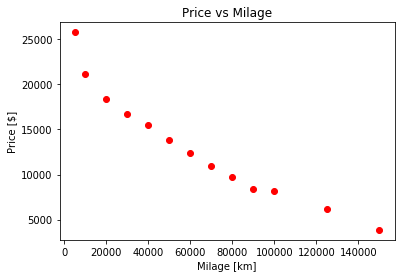

In [198]:
plt.plot(pd.Series(avg_price_by_milage), 'ro')
plt.xlabel('Milage [km]')
plt.ylabel('Price [$]')
plt.title('Price vs Milage')

As we can see on the graph above there is a linear correlation between the price and milage. If the car has less milage then it's price is higher.

### Worth to buy damaged car?
Now we are going to compare damaged cars to the operable ones to see if there is any corelation in price.

In [199]:
damaged_vs_ok_price=autos[['prices_dol','unrepaired_damages']]
damaged_yes=damaged_vs_ok_price['unrepaired_damages'] == 'yes'
damaged_prices=damaged_vs_ok_price.loc[damaged_yes,:]
ok_prices=damaged_vs_ok_price.loc[~damaged_yes,:]
damaged_prices_mean=damaged_prices.mean(skipna = True)
ok_prices_mean=ok_prices.mean(skipna = True)
difference_prices=(damaged_prices_mean/ok_prices_mean)*100
print(difference_prices)

prices_dol    36.753154
dtype: float64


Brocken cars are in average 36% cheaper then operable ones.

### The most common model
Lets now find the most common brand/model combinations.

In [200]:
autos[['brands','models']].describe()

,brands,models
count,50000,47242
unique,40,245
top,volkswagen,golf
freq,10687,4024


In [201]:
model_by_brand={}
all_brands=autos['brands'].value_counts(normalize=True).index[0:20]

for brand in all_brands:
    all_models_per_brand=autos.loc[autos['brands']==brand,'models']
    model_by_brand[brand]=all_models_per_brand
    
# print(model_by_brand)
model_brand=pd.DataFrame(model_by_brand)
model_brand.describe()

,volkswagen,opel,bmw,mercedes_benz,audi,ford,renault,peugeot,fiat,seat,skoda,mazda,nissan,citroen,smart,toyota,sonstige_autos,hyundai,volvo,mini
count,10198,5221,5162,4578,4129,3316,2316,1346,1239,908,765,707,726,666,662,598,0,451,440,422
unique,22,16,10,18,16,14,10,6,10,10,7,8,9,7,4,8,0,5,9,4
top,golf,corsa,3er,c_klasse,a4,focus,twingo,2_reihe,punto,ibiza,octavia,3_reihe,micra,andere,fortwo,yaris,NaN,i_reihe,v70,cooper
freq,4024,1735,2761,1172,1291,811,677,621,458,356,309,182,257,238,574,129,NaN,179,97,279


Here we can see in row **top** the most popular model for each brand from 20 most common brands.

## Conclusion
As have complited our analysis. There are a few takeaways:
- The most popular car producer on the second hand market is Volkswagen which leave others behind. 
- The most popular model is VV golf which is also strong number one.
- If you are interested in buing damaged car you can save around 36%.
- The most expensive brands out of 10 most popular are: Audi, Mercedez-Benz and BMW. Whereas the chiepest one is Renault.
- The less mileage the car is more expensive. There is a strong correlation between these two.